# Top 10 Genres of all Time

In [9]:
#Importing all the required libraries and packages
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None #'warn'
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as p
%matplotlib inline

In [15]:
#Reading the csv files 
#album_details = pd.read_csv("World_Music_Album_Details.csv", sep = ",", na_values=["N/A"], encoding = 'latin-1')
band_details = pd.read_csv("World_Music_Bands_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )
#review_details = pd.read_csv("World_Music_Reviews_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )

In [26]:
main_genres = band_details.groupby("Band_Genre")["Band_Genre"].count().sort_values().tail(10)
main_genres["others"] = band_details.shape[0] - main_genres.sum()
colors = ['yellowgreen','blue','pink','orange','gold','lightskyblue']

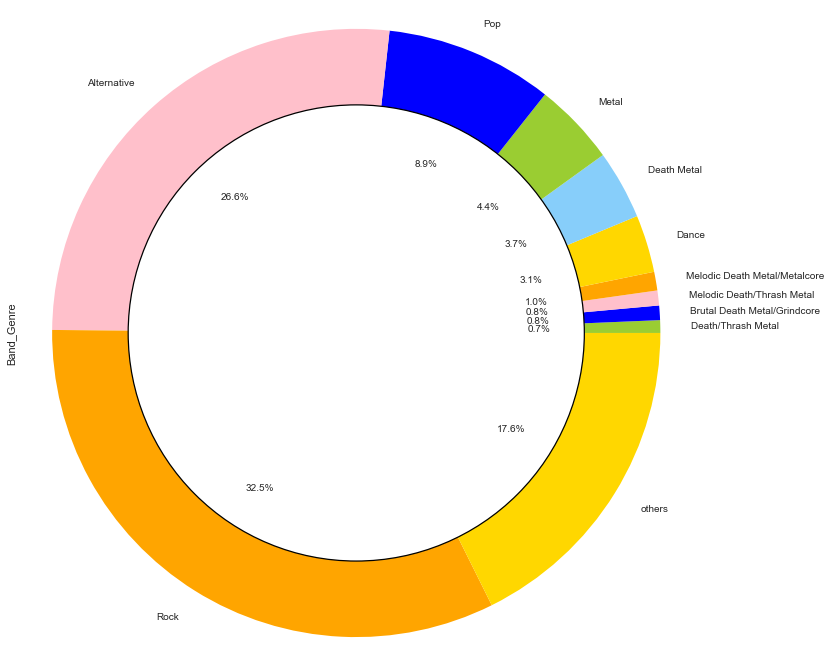

In [17]:
main_genres_plot = main_genres.plot.pie(colors = colors, autopct='%1.1f%%', figsize=(12, 12))
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show() 

# Number of Distinct Genres Released in a Particular Year

In [31]:
band_drop = band_details[["Band_Formation","Band_Genre"]].drop_duplicates()
band_group = band_drop.groupby("Band_Formation")["Band_Genre"].count()
band_df = pd.DataFrame(band_group)
band_reset = band_df.reset_index()
band_sort = band_reset.sort(ascending = False).head()
band_sort.to_csv('Distinct Genres_Years.csv')
band_sort.head()

,Band_Formation,Band_Genre
39,2016.0,8
38,2015.0,27
37,2014.0,50
36,2013.0,50
35,2012.0,72


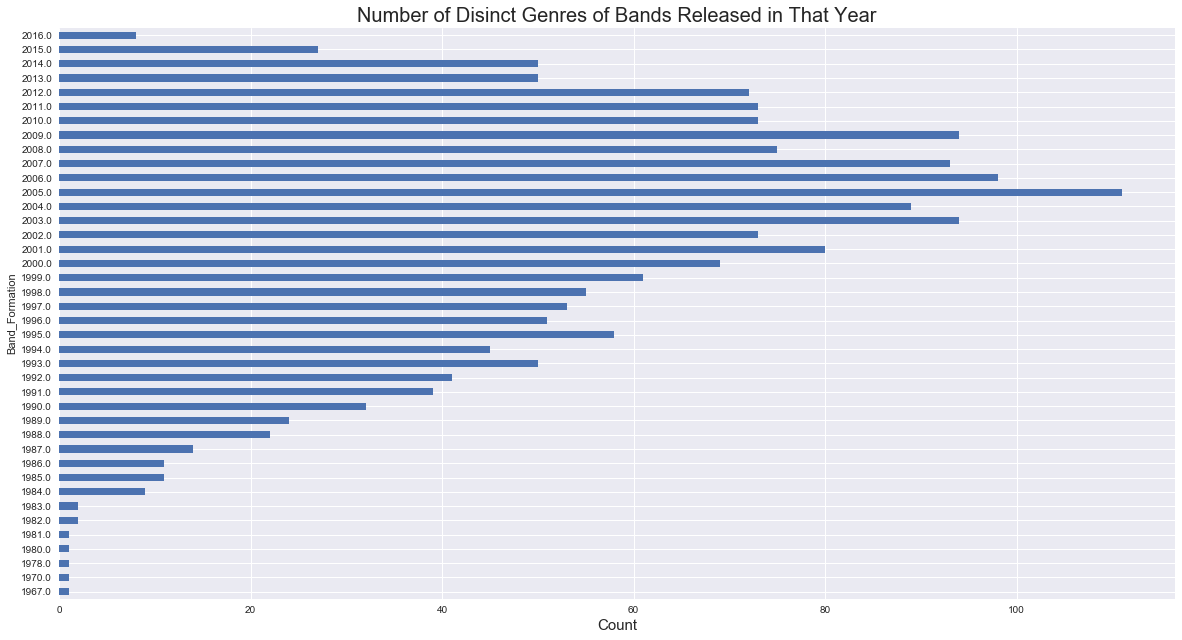

In [32]:
band_plot = band_group.plot.barh(x = band_reset["Band_Formation"], y = band_reset["Band_Genre"])
band_label = band_plot.set_xlabel("Count", fontsize=15)
band_label = band_plot.set_title("Number of Disinct Genres of Bands Released in That Year", fontsize=20)
fig = plt.gcf()
fig.set_size_inches(20, 10.5)